# エルボー法を用いいて最適なクラスター数を指定する

In [325]:
#Import package

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = 'Hiragino Maru Gothic Pro'

In [327]:
#df = pd.read_csv("2323-1000packet.csv")
#del df1['TTL']
#print(df1.head())
#print(type(df1))

df = pd.read_csv("./01_data/2016-09-30.csv")
del df['TTL']
del df['DPORT']
del df['SRCIP']
print(df.tail())
print(type(df))

          IPID       DSTIP  SPORT        TSEQ  WINDS
6797856    353  3390657314  32220  3390657314  10489
6797857  54444  3390658545  24350  3390658545  46213
6797858  33586  3390658482  56011  3921595485  14600
6797859  18950  3390658487  46605  1221083247  14600
6797860  45622  3390656600  11345  3390656600  43946
<class 'pandas.core.frame.DataFrame'>


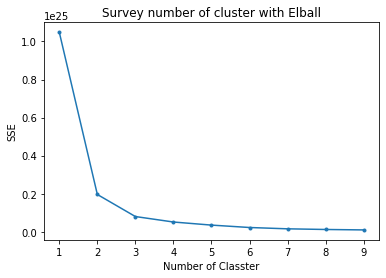

In [328]:
#エルボー法
#tol: Consider about it（収束と判断できる相対的誤差） 
X = df
max_cluster = 10
SSE = []
for i in range(1,max_cluster):
    #インスタンス
    kmeans = KMeans(n_clusters = i,      #クラスタの個数
                    init = 'k-means++',  #k平均++法によりクラスタ中心を選択
                    n_init= 5,           #異なるセントロイドの初期値を用いたk平均法アルゴリズム実行回数
                    max_iter=350,        #k平均法アルゴリズム内部の最大イテレーション(サイクル繰り返し)回数
                    tol=1e-20,           #収束と判定できる相対的許容誤差
                    random_state = 42    #セントロイド初期化に際して、用いる乱数生成器の設定
                   ) 
    
    #演算
    kmeans.fit(X)
    #wcss値に変換＆リスト格納
    SSE.append(kmeans.inertia_)
    
#可視化
plt.plot(range(1,max_cluster), SSE, marker= ".")
plt.title('Survey number of cluster with Elball')
plt.xlabel('Number of Classter')
plt.ylabel('SSE')
plt.show()

# クラスタリングモデル作成(Data 2016.09.30/2323port/Mirai:10%)

In [2]:
#Import package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from matplotlib import rcParams
from matplotlib import cm
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = 'Hiragino Maru Gothic Pro'

In [3]:
#データを読み込んで、形式を変換する
data = pd.read_csv("./01_data/2016-09-30.csv")
#data = pd.read_csv("./00_sample/result.csv")
del data['TTL']
#del data['DPORT']
del data['SRCIP']
#del data['TTL']

In [4]:
data_array = np.array([data['IPID'].tolist(),
#                       data['TTL'].tolist(),
#                       data['SRCIP'].tolist(),
                       data['DSTIP'].tolist(),
                       data['SPORT'].tolist(),
                       data['DPORT'].tolist(),
                       data['TSEQ'].tolist(),
                       data['WINDS'].tolist()
                      ], np.int32)
#行列を転置
#標準化する
sc.fit(data_array)
data_array_norm = sc.transform(data_array)
data_array = data_array.T
X = data_array

In [5]:
#k-meansインスタンス
kmeans = KMeans(n_clusters = 5,      #クラスタの個数
                init = 'k-means++',  #k平均++法によりクラスタ中心を選択
                n_init= 5,          #異なるセントロイドの初期値を用いたk平均法アルゴリズム実行回数
                max_iter=300,        #k平均法アルゴリズム内部の最大サイクル繰り返し回数
                tol=1e-30,           #収束判定する相対的許容誤差
                random_state = 100   #セントロイド初期化に際して、用いる乱数シードを設定
               ) 

#演算
y_kmeans = kmeans.fit_predict(X)
#print(y_kmeans)
#配列情報
cluster_labels = np.unique(y_kmeans)               #一意なクラスター要素
print(cluster_labels)
n_clusters = cluster_labels.shape[0]               #配列の長さ
#print(n_clusters)

[0 1 2 3 4]


In [6]:
print(data.head(1))
#print(X[y_kmeans == 0, 0])
#print(X[y_kmeans == 0, 1])

    IPID       DSTIP  SPORT  DPORT      TSEQ  WINDS
0  35341  3390657995  27780     80  95346369   5840


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

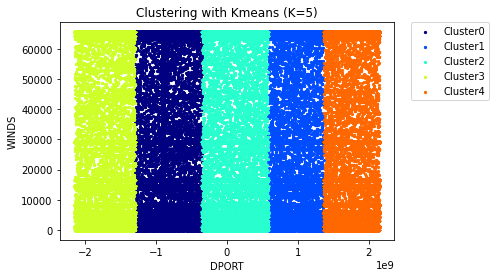

In [16]:
#グラフ可視化
for i in range(len(cluster_labels)):
    color = cm.jet(float(i) / n_clusters)
    plt.scatter(X[y_kmeans == i, 4], X[y_kmeans == i, 5], s = 5, c = color, label = 'Cluster'+str(i))

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Clustering with Kmeans (K=5)')
plt.xlabel('DPORT')
plt.ylabel('WINDS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

In [17]:
#ラベルを取得し、別列で追加
data['cluster_id'] = y_kmeans
#count = data['cluster_id'].value_counts()

#各グループのデータを取得する
group0 = data.loc[data['cluster_id'] ==0]
group1 = data.loc[data['cluster_id'] ==1]
group2 = data.loc[data['cluster_id'] ==2]
group3 = data.loc[data['cluster_id'] ==3]
group4 = data.loc[data['cluster_id'] ==4]
group5 = data.loc[data['cluster_id'] ==5]
#group6 = data.loc[data['cluster_id'] ==6]
#group7 = data.loc[data['cluster_id'] ==7]
group8 = data.loc[data['cluster_id'] ==8]
#group9 = data.loc[data['cluster_id'] ==9]

#クラスタフィーリドを削除
del group0['cluster_id']
del group1['cluster_id']
del group2['cluster_id']
del group3['cluster_id']
del group4['cluster_id']
del group5['cluster_id']
#del group6['cluster_id']
#del group7['cluster_id']
#del group8['cluster_id']
#del group9['cluster_id']

#print(group9.head())
#test_data = group9.head(10)
#print(test_data)
#可視化データ準備
#group0 = group0.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
#group1 = group1.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
#group2 = group2.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
#group3 = group3.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
#data2 = data.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "TSEQ", "WINDS"]]
#group0

#ファイルに書き込む
#group0.to_csv(r"./01_data/group0-4.csv", index=False)
#group1.to_csv(r"./01_data/group1-4.csv", index=False)
#group2.to_csv(r"./01_data/group2-4.csv", index=False)
#group3.to_csv(r"./01_data/group3-4.csv", index=False)

# Seaborn Pairplot

In [ ]:
#a4_dims= (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#可視化する
#plt.figure(figsize=(8,5))
#sns.pairplot(data = group0, corner=True)
#sns.pairplot(data = group1, corner=True)
#sns.pairplot(data = group2, corner=True)
#sns.pairplot(data = group3, corner=True)
#sns.pairplot(data = group4, corner=True)
#plt.show()
#sns.pairplot(data = group5, corner=True)
#sns.pairplot(data = group6, corner=True)
#sns.pairplot(data = group7, corner=True)
#sns.pairplot(data = group8, corner=True)
#sns.pairplot(data = group9, corner=True)
#sns.pairplot(data = test_data, corner=True).savefig("pairplot.png")
#sns.pairplot(data = data2, corner=True)

# Scatter Plot

In [21]:
len(group0)

2486198

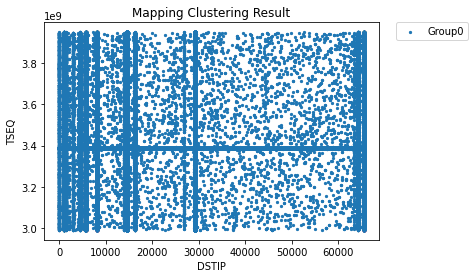

In [18]:
plt.scatter(group0['WINDS'], group0['TSEQ'], s = 5, label = "Group0")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

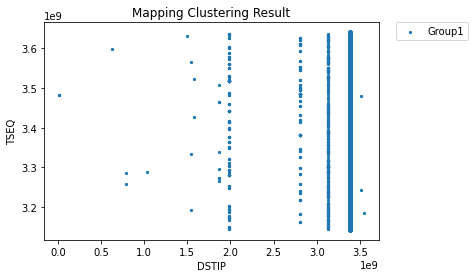

In [378]:
plt.scatter(group1['DSTIP'], group1['TSEQ'], s = 5, label = "Group1")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

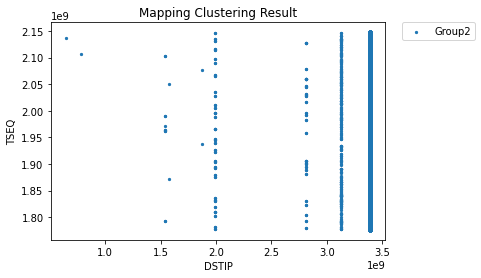

In [379]:
plt.scatter(group2['DSTIP'], group2['TSEQ'], s = 5, label = "Group2")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

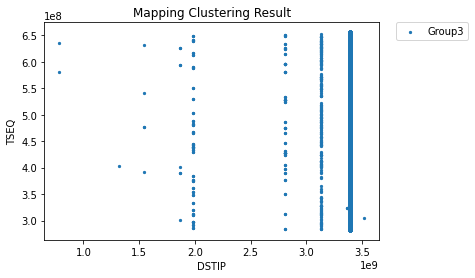

In [380]:
plt.scatter(group3['DSTIP'], group3['TSEQ'], s = 5, label = "Group3")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

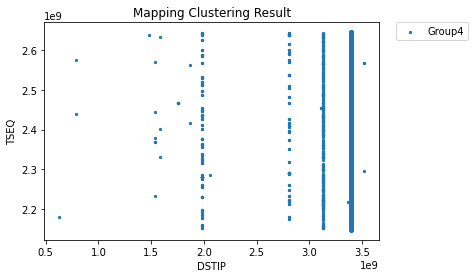

In [381]:
plt.scatter(group4['DSTIP'], group4['TSEQ'], s = 5, label = "Group4")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

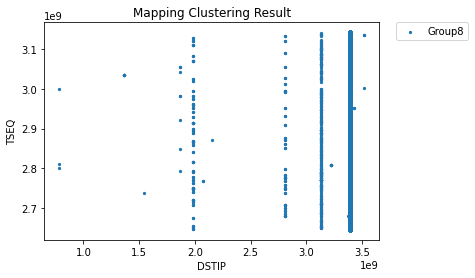

In [382]:
plt.scatter(group8['DSTIP'], group8['TSEQ'], s = 5, label = "Group8")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

# Scatting Plot (範囲指定）

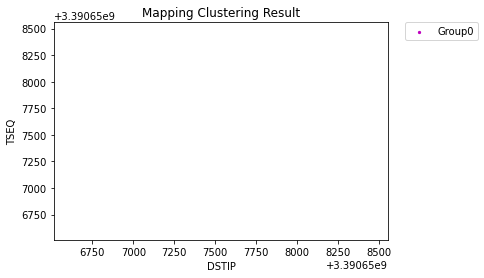

In [383]:
#Figure Setting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3390656513, 3390658559)
ax.set_ylim(3390656513, 3390658559)

plt.scatter(group0['DSTIP'], group0['TSEQ'], s = 5, label = "Group0", c = "m")
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

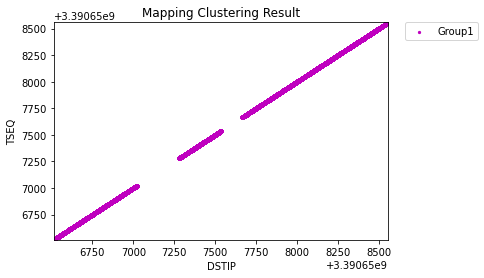

In [384]:
#Figure Setting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3390656513, 3390658559)
ax.set_ylim(3390656513, 3390658559)

plt.scatter(group1['DSTIP'], group1['TSEQ'], s = 5, label = "Group1",c='m')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

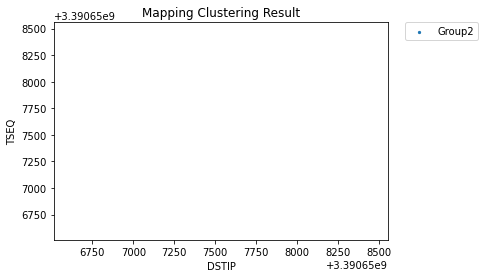

In [385]:
#Figure Setting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3390656513, 3390658559)
ax.set_ylim(3390656513, 3390658559)

plt.scatter(group2['DSTIP'], group2['TSEQ'], s = 5, label = "Group2")
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

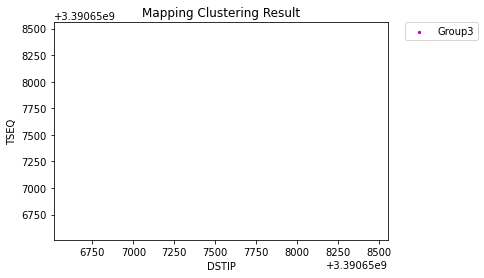

In [386]:
#Figure Setting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3390656513, 3390658559)
ax.set_ylim(3390656513, 3390658559)

plt.scatter(group3['DSTIP'], group3['TSEQ'], s = 5, label = "Group3", c = 'm')
plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

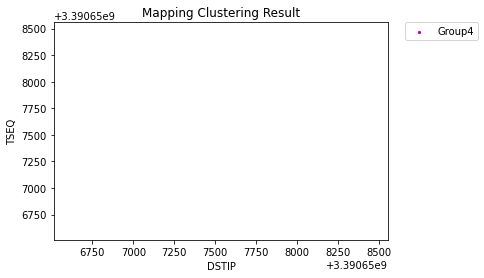

In [387]:
#Figure Setting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(3390656513, 3390658559)
ax.set_ylim(3390656513, 3390658559)

plt.scatter(group4['DSTIP'], group4['TSEQ'], s = 5, label = "Group4", c = 'm')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')

plt.title('Mapping Clustering Result')
plt.xlabel('DSTIP')
plt.ylabel('TSEQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()